# Profile Networks
The current available networks are:
* AgeNet
* GenderNet
* FaceNet
* SoS_AlexNet
* SOS_ GoogleNet

## Data
The data is located in the folder `./profile-networks`, which can be accessed after unzipping `profile-networks.zip`. In profile-networks, there is the folder linear. This folder contains the individual timing values of each layer. The other folder in profile-networks is memory, which contains end-to-end measurements of the system under various memory constraints.

## Linear mode
To profile the above networks, 51 replication are run to minmize random factors.
The testbed used (EdgeCaffe) was set to run in linear configuration. This means only 1 networks is running at the same time and the networks don't interfere with eachother. To replicate the results, the script `RunBatch.sh` can be used.

## Compare Convolutional layers and Fully Connected layers
The paper DeepEye states that the maximal speed up gain (using interleaving) is 2 when the total time of the convolutional layers and the total time of the fully connected layers is equal to eachother. This theoretical claim will not hold in most networks. To show this we plot the time for the convolutional layers and the fully connected layers per network

## Resource constrained mode
To profile the effect of the policies under different memory constraints, EdgeCaffe was configure to run under each policy (Linear, DeepEye, Partial, and Bulk). To replicate the results, the script `RunAllModes.sh` can be used.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
pathToData = './profile-networks'
# Make sure the paths exist
from pathlib import Path
Path('{}/graphs'.format(pathToData)).mkdir(parents=True, exist_ok=True)

In [3]:
# Read all the linear files into a pandas dataframe
pathToLinearFiles = '{}/linear/*.csv'.format(pathToData)
all_files = glob.glob(pathToLinearFiles)
li = []
for filename in all_files:
    print('Reading file \'{}\''.format(filename))
    df = pd.read_csv(filename)
    li.append(df)
data = pd.concat(li, axis=0, ignore_index=True)

Reading file './profile-networks/linear/SoS-linear-15.csv'
Reading file './profile-networks/linear/linear-16.csv'
Reading file './profile-networks/linear/linear-6.csv'
Reading file './profile-networks/linear/linear-11.csv'
Reading file './profile-networks/linear/linear-5.csv'
Reading file './profile-networks/linear/SoS-linear-14.csv'
Reading file './profile-networks/linear/linear-3.csv'
Reading file './profile-networks/linear/SoS-linear-11.csv'
Reading file './profile-networks/linear/linear-13.csv'
Reading file './profile-networks/linear/linear-4.csv'
Reading file './profile-networks/linear/SoS-linear-10.csv'
Reading file './profile-networks/linear/SoS-linear-16.csv'
Reading file './profile-networks/linear/linear-15.csv'
Reading file './profile-networks/linear/SoS-linear-7.csv'
Reading file './profile-networks/linear/SoS-linear-5.csv'
Reading file './profile-networks/linear/linear-14.csv'
Reading file './profile-networks/linear/SoS-linear-1.csv'
Reading file './profile-networks/linear/

In [4]:
# Split the data by network
ageNet = data[data.networkName == 'AgeNet']
genderNet = data[data.networkName == 'GenderNet']
faceNet = data[data.networkName == 'FaceNet']
sos_google = data[data.networkName == 'Salient Object Subitizing_google']
sos_alex = data[data.networkName == 'Salient Object Subitizing']
# Print the found networks
data.networkName.unique()

array(['Salient Object Subitizing', 'Salient Object Subitizing_google',
       'AgeNet', 'GenderNet', 'FaceNet'], dtype=object)

In [5]:
def plotLayerGraph(df, title='', layerNames=False, filename=None):
    if layerNames:
        x_label = 'layerName'
    else:
        x_label = 'layerId'
    plt.figure(figsize=(8,4))
    sns.lineplot(data=df, x=x_label, y='Loading_ns', label='loading')
    sns.lineplot(data=df, x=x_label, y='execution_ns', label='execution')
    plt.ylabel('Time (ns)')
    if layerNames:
        plt.xticks(rotation=45)
    plt.title(title)
    if filename:
        plt.savefig(filename)
    plt.show()
    
def plotLayerBarGraph(df, title='', filename=None):
    plt.figure(figsize=(8,4))
    sns.barplot(x="layerId", y="time", hue='type', data=df)
    plt.ylabel('Time (ns)')
    plt.title(title)
    if filename:
        plt.savefig(filename)
    plt.show()

def mergeColumnsTime(df):
    merged_df = pd.DataFrame()
    for row in df.itertuples():
        merged_df = merged_df.append({'networkName': row.networkName,"layerId" : row.layerId, "layerName" : row.layerName, "time" : row.Loading_ns, "policy" : row.policy, "type" : 'loading'}, ignore_index=True)
        merged_df = merged_df.append({'networkName': row.networkName,"layerId" : row.layerId, "layerName" : row.layerName, "time" : row.execution_ns, "policy" : row.policy, "type" : 'execution'}, ignore_index=True)
    merged_df = merged_df.astype({'layerId': 'int32'})
    return merged_df

In [6]:
# Merge the time columns for seaborn plotting.
# This will take a while! SoS_GoogleNet has a lot of layers and will take a long time to be merged!
# To spead up everything you can exclude SoS_GoogleNet
print('Merging {}'.format('AgeNet'))
merged_ageNet = mergeColumnsTime(ageNet)
print('Merging {}'.format('GenderNet'))
merged_genderNet = mergeColumnsTime(genderNet)
print('Merging {}'.format('FaceNet'))
merged_faceNet = mergeColumnsTime(faceNet)
print('Merging {}'.format('SoS_AlexNet'))
merged_sos_alex = mergeColumnsTime(sos_alex)
print('Merging {}'.format('SoS_GoogleNet'))
merged_sos_google = mergeColumnsTime(sos_google)

Merging AgeNet
Merging GenderNet
Merging FaceNet
Merging SoS_AlexNet
Merging SoS_GoogleNet


## Plot bar line charts of the time taken by each layer

In [7]:
temp_file='_temp'

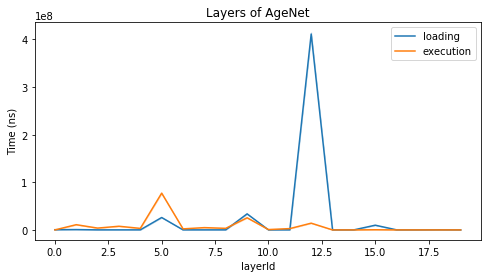

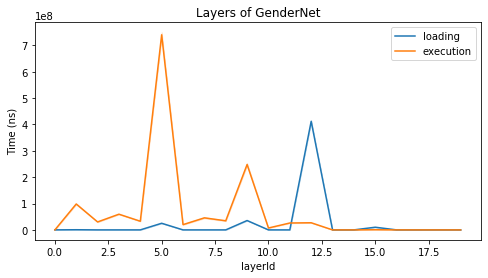

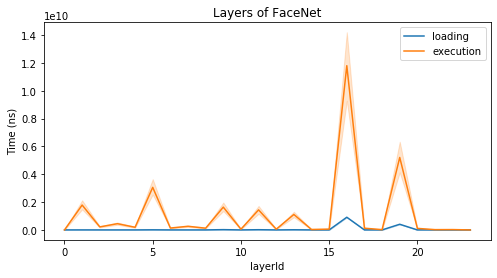

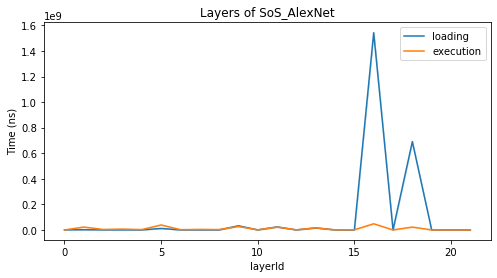

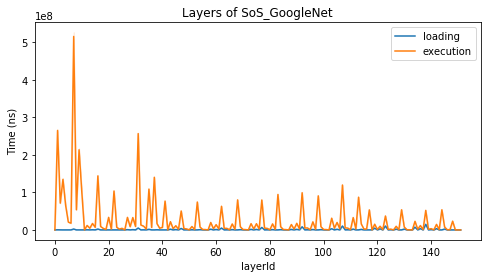

In [8]:
plotLayerGraph(ageNet, 'Layers of AgeNet', filename='{}/graphs/agenet_line_layers{}.png'.format(pathToData,temp_file))
plotLayerGraph(genderNet, 'Layers of GenderNet', filename='{}/graphs/gendernet_line_layers{}.png'.format(pathToData,temp_file))
plotLayerGraph(faceNet, 'Layers of FaceNet', filename='{}/graphs/facenet_line_layers{}.png'.format(pathToData,temp_file))
plotLayerGraph(sos_alex, 'Layers of SoS_AlexNet', filename='{}/graphs/SoS_AlexNet_line_layers{}.png'.format(pathToData,temp_file))
plotLayerGraph(sos_google, 'Layers of SoS_GoogleNet', filename='{}/graphs/SoS_GoogleNet_line_layers{}.png'.format(pathToData,temp_file))

## Plot bar line charts of the time taken by each layer

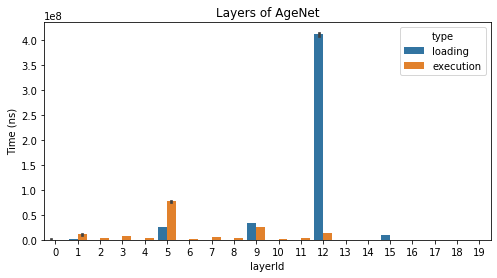

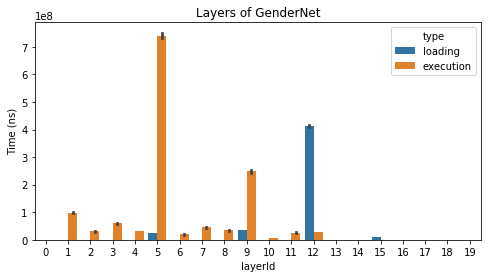

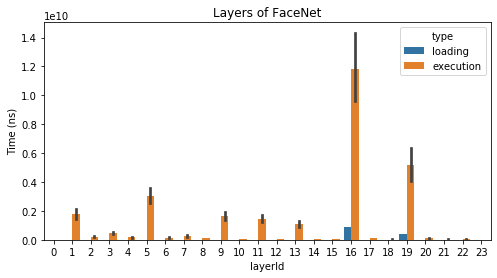

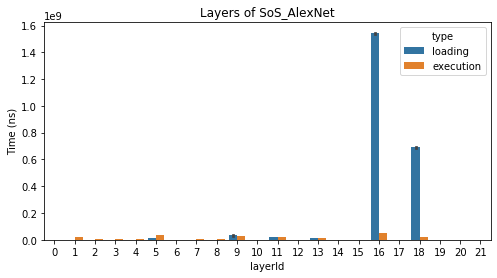

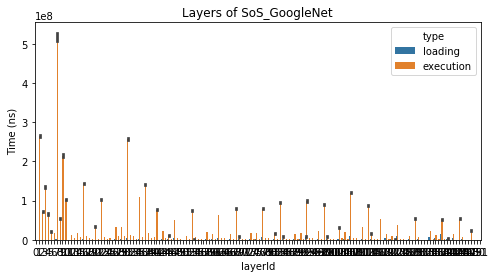

In [9]:
plotLayerBarGraph(merged_ageNet, 'Layers of AgeNet', filename='{}/graphs/agenet_bar_layers{}.png'.format(pathToData,temp_file))
plotLayerBarGraph(merged_genderNet, 'Layers of GenderNet', filename='{}/graphs/gendernet_bar_layers{}.png'.format(pathToData,temp_file))
plotLayerBarGraph(merged_faceNet, 'Layers of FaceNet', filename='{}/graphs/facenet_bar_layers{}.png'.format(pathToData,temp_file))
plotLayerBarGraph(merged_sos_alex, 'Layers of SoS_AlexNet', filename='{}/graphs/SoS_AlexNet_bar_layers{}.png'.format(pathToData,temp_file))
plotLayerBarGraph(merged_sos_google, 'Layers of SoS_GoogleNet', filename='{}/graphs/SoS_GoogleNet_bar_layers{}.png'.format(pathToData,temp_file))

# Compare Convolutional layers and Fully Connected layers
The paper DeepEye states that the maximal speed up gain (using interleaving) is 2 when the total time of the convolutional layers and the total time of the fully connected layers is equal to eachother. This theoretical claim will not hold in most networks. To show this we plot the time for the convolutional layers and the fully connected layers per network

In [10]:
# Define the number of layers for convolutional and fully connected
ageNet_layers = {'conv': 12, 'fc':8}
genderNet_layers = {'conv': 12, 'fc':8}
faceNet_layers = {'conv': 17, 'fc':8}
sos_Alex_layers = {'conv': 16, 'fc':6}
sos_Google_layers = {'conv': 10, 'fc':142}

In [11]:
def calc_split(df, conf, networkName):
    df_conv = df[df.layerId < conf['conv']].groupby('layerId').mean().sum()
    df_fc = df[df.layerId >= conf['conv']].groupby('layerId').mean().sum()
    return [
        [networkName, (df_conv.values[0] + df_conv.values[1]), 'conv'],
        [networkName, (df_fc.values[0]), 'fc'],
    ]

In [18]:
ageNet

,networkName,layerId,layerName,Loading_ns,execution_ns,policy
522,AgeNet,0,input,872056,11687,linear
523,AgeNet,1,conv1,846294,10208907,linear
524,AgeNet,2,relu1,96749,4181261,linear
525,AgeNet,3,pool1,129668,7543525,linear
526,AgeNet,4,norm1,191724,3091004,linear
...,...,...,...,...,...,...
10001,AgeNet,15,fc7,10431733,646755,linear
10002,AgeNet,16,relu7,110088,20969,linear
10003,AgeNet,17,drop7,120363,19257,linear
10004,AgeNet,18,fc8,376244,50053,linear


In [12]:
lines = []
lines += calc_split(ageNet, ageNet_layers, 'AgeNet')
lines += calc_split(genderNet, genderNet_layers, 'GenderNet')
lines += calc_split(faceNet, faceNet_layers, 'FaceNet')
lines += calc_split(sos_alex, sos_Alex_layers, 'SoS AlexNet')
lines += calc_split(sos_google, sos_Google_layers, 'SoS GoogleNet')

# Create a dataset with FaceNet excluded because of the high execution time, it will compress the bars of the other networks in the graph.
lines_excl = []
lines_excl += calc_split(ageNet, ageNet_layers, 'AgeNet')
lines_excl += calc_split(genderNet, genderNet_layers, 'GenderNet')
lines_excl += calc_split(sos_alex, sos_Alex_layers, 'SoS AlexNet')
lines_excl += calc_split(sos_google, sos_Google_layers, 'SoS GoogleNet')

In [13]:
# Create the pandas DataFrame 
conv_fc = pd.DataFrame(lines, columns = ['network', 'time','type']) 
conv_fc_excl = pd.DataFrame(lines_excl, columns = ['network', 'time','type']) 

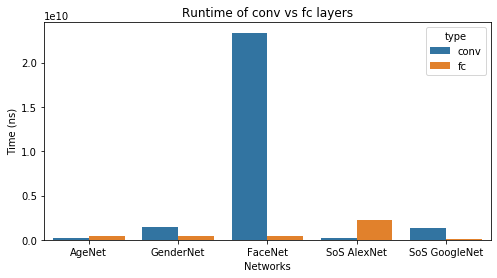

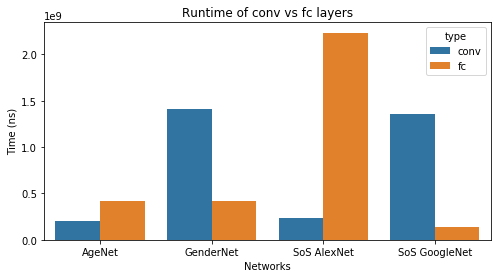

In [14]:
temp_file='_temp'
plt.figure(figsize=(8,4))
sns.barplot(x="network", y='time', hue='type', data=conv_fc)
plt.title('Runtime of conv vs fc layers')
plt.xlabel('Networks')
plt.ylabel('Time (ns)')
plt.savefig('{}/graphs/ratio_conv_fc{}.png'.format(pathToData,temp_file))
plt.show()

# Plot without FaceNet to better see the difference
plt.figure(figsize=(8,4))
sns.barplot(x="network", y='time', hue='type', data=conv_fc_excl)
plt.title('Runtime of conv vs fc layers')
plt.xlabel('Networks')
plt.ylabel('Time (ns)')
plt.savefig('{}/graphs/ratio_conv_fc_excl_facenet{}.png'.format(pathToData,temp_file))
plt.show()

# Running in constrained memory environments
The available memory is limited using cgroups. 8GB of swap memory was available for all scenarios to prevent killing by the OS due to memory shortage. Using swapping memory is slower than using virtual memory. This effect is visible in the graphs below

In [15]:
# Read end-to-end times
# The measured time is in miliseconds
memory = pd.read_csv('{}/memory/memory.csv'.format(pathToData))
# Covert the time in miliseconds to seconds
memory['time'] = memory['time'] / (1000) 

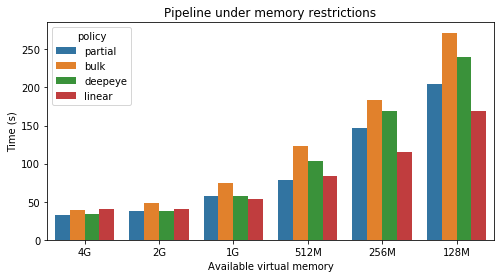

In [16]:
plt.figure(figsize=(8,4))
sns.barplot(data=memory, x='mem_limit', y='time', hue='policy')
plt.title('Pipeline under memory restrictions')
plt.xlabel('Available virtual memory')
plt.ylabel('Time (s)')
plt.savefig('{}/graphs/mem_limit_incl_linear.png'.format(pathToData))
plt.show()

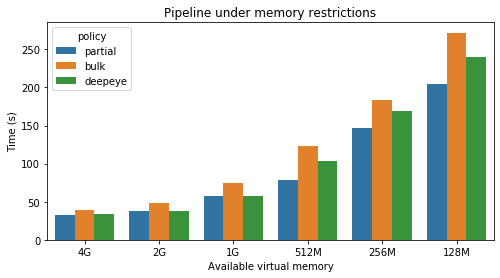

In [17]:
# Ignore the linear policy
exclude_linear = memory.drop(memory[memory['policy'] == 'linear'].index)

plt.figure(figsize=(8,4))
sns.barplot(data=exclude_linear, x='mem_limit', y='time', hue='policy')
plt.title('Pipeline under memory restrictions')
plt.xlabel('Available virtual memory')
plt.ylabel('Time (s)')
plt.savefig('{}/graphs/mem_limit_excl.png'.format(pathToData))
plt.show()